In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Read dataset and preprocess

In [2]:
# read data and preprocess(drop the row with 'null' value)
path = 'data/riceClassification.csv'
df = pd.read_csv(path).dropna()
df = df.sample(frac=0.1, random_state=42)

# remove extreme values
# IQR
columns = df.columns[1:-1]
Q1 = df[columns].quantile(0.25)
Q3 = df[columns].quantile(0.75)
IQR = Q3 - Q1
# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filter out extreme values
df = df[(df[columns] > lower_bound).all(axis=1) & (df[columns] < upper_bound).all(axis=1)]

# define X, y
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

# split train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# UNSUPERVISED

## PCA

In [3]:
# PCA
from sklearn.decomposition import PCA
n_components = 4
pca = PCA(n_components=n_components)
pcs = pca.fit_transform(X_train)

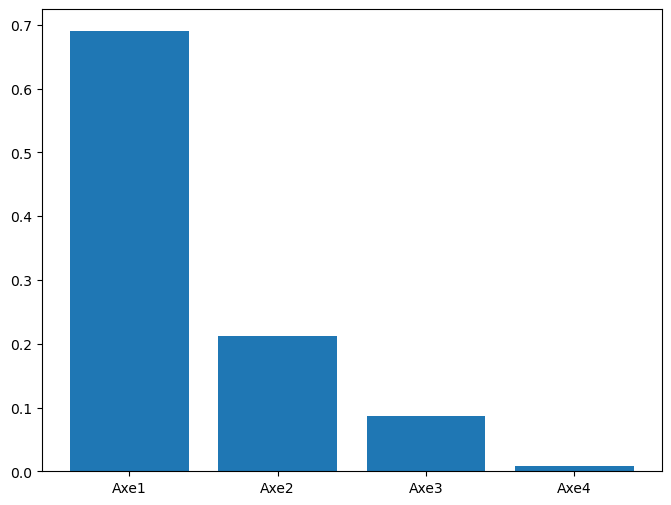

In [4]:
# plot the explained_variance_ratio of each components
plt.figure(figsize=(8, 6))
plt.bar([f"Axe{i}" for i in range(1, n_components+1)], pca.explained_variance_ratio_)
plt.show()

<Axes: >

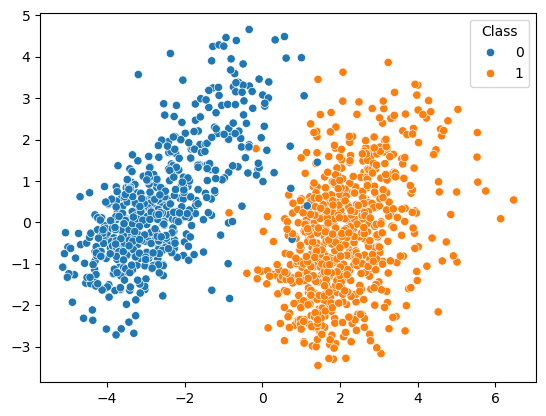

In [5]:
# plot the scatterplot, color with y_train('sex' attribute)
sns.scatterplot(x=pcs[:,0],y=pcs[:,1], hue=y_train)

Clearly by using these two components we can easily separate these two classes.


## MDS

In [6]:
# MDS
from sklearn.manifold import MDS
n_components = 2
mds = MDS(n_components=n_components, dissimilarity='euclidean', random_state=42)
X_transformed = mds.fit_transform(X_train)


(array([4.07616927, 1.87231007, 2.55916367, ..., 3.21878374, 3.45072958,
        3.88388543]),
 array([3.81378981, 1.41060785, 2.40515146, ..., 3.36069577, 2.83324683,
        3.36896339]))

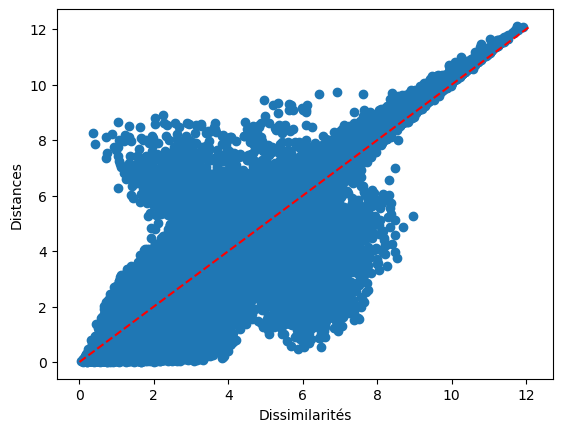

In [7]:
# draw the Shepard plot
from src.utils import plot_Shepard
plot_Shepard(mds)

<Axes: >

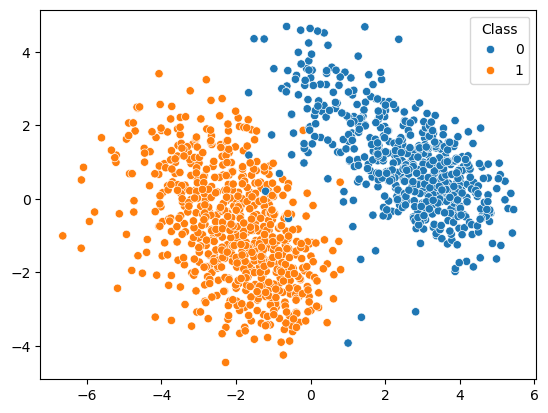

In [8]:
# plot the scatterplot, color with y_train('sex' attribute)
sns.scatterplot(x=X_transformed[:,0],y=X_transformed[:,1], hue=y_train)

Clearly by using these two components we can easily separate these two classes.

## AgglomerativeClustering

In [9]:
# AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
n_clusters = 2
pred_train = AgglomerativeClustering(n_clusters = n_clusters, metric='euclidean', linkage='complete').fit(X_train).labels_

<Axes: >

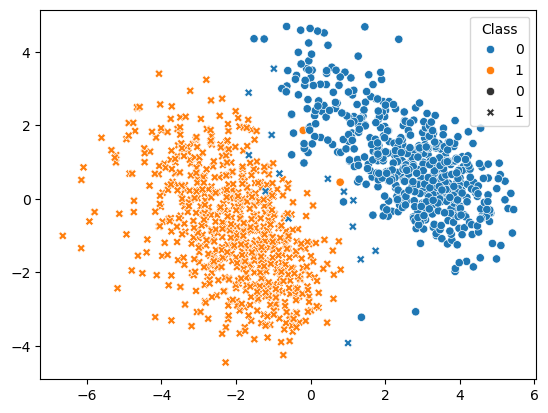

In [10]:
# plot the scatterplot, color with y('sex' attribute), style with pred_train
sns.scatterplot(x=X_transformed[:,0],y=X_transformed[:,1], hue=y_train, style=pred_train)

## KMeans

In [11]:
# KMeans
from sklearn.cluster import KMeans
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans.fit(X_train)
pred_train = kmeans.labels_

C:\Users\gouha\anaconda3\envs\sy09\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


<Axes: >

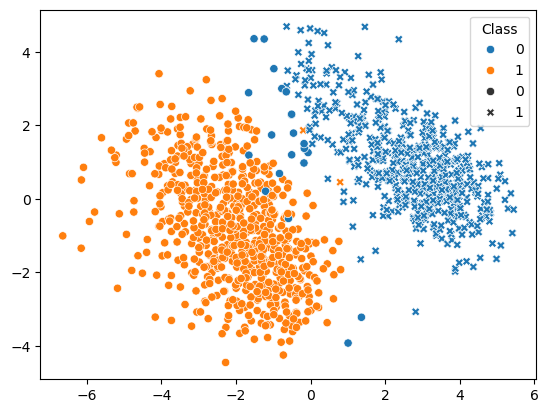

In [12]:
# plot the scatterplot, color with y('sex' attribute), style with pred_train
sns.scatterplot(x=X_transformed[:,0],y=X_transformed[:,1], hue=y_train, style=pred_train)

# SUPERVISED

## KNN

In [13]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
pred_test = knn.predict(X_test)

In [14]:
# PCA
from sklearn.decomposition import PCA
n_components = 4
pca = PCA(n_components=n_components)
pcs = pca.fit_transform(X_test)

<Axes: >

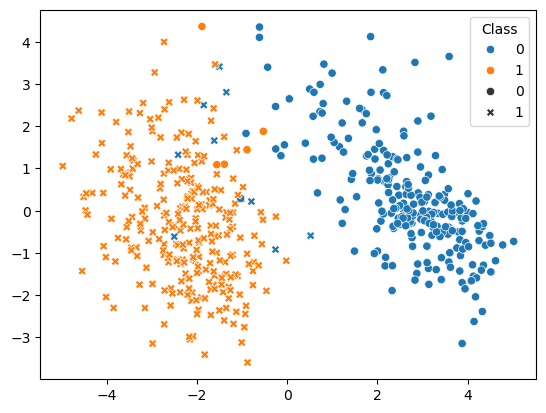

In [15]:
# plot the scatterplot, color with y_test('sex' attribute), style with pred_test
sns.scatterplot(x=pcs[:,0],y=pcs[:,1], hue=y_test, style=pred_test)